


# Week 1: Setup and Data Preparation



## Import Libraries


In [1]:
# import lib
import csv
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from tensorflow import keras
layers = keras.layers
models = keras.models
import nltk
nltk.download('punkt')  # This will download the punkt tokenizer
nltk.download('stopwords')  # Download stopwords
nltk.download('wordnet')  # Download WordNet for lemmatization
nltk.download('punkt_tab')
import re
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize.treebank import TreebankWordDetokenizer

from collections import Counter


print("You have TensorFlow version", tf.__version__)

You have TensorFlow version 2.13.0


[nltk_data] Downloading package punkt to /Users/0xnrous/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/0xnrous/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/0xnrous/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/0xnrous/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
# import sys
# print(sys.executable)

In [3]:
# !/Users/0xnrous/Developer/Tensorflow/env/bin/python -m pip install wordcloud

In [4]:
# model_64_dense.save('text_classification_model.h5')  # Save the model in HDF5 format

In [5]:
# !pip install nltk

## Load Data

In [6]:
# load data
file_path = 'bbc-text.csv'
data = pd.read_csv(file_path)
data=data.rename(columns = {'text': 'News_Headline'}, inplace = False)
print(data.head())

        category                                      News_Headline
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve...


## EDA

In [7]:
data

,category,News_Headline
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category       2225 non-null   object
 1   News_Headline  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [9]:
data.describe()

,category,News_Headline
count,2225,2225
unique,5,2126
top,sport,kennedy questions trust of blair lib dem leade...
freq,511,2


In [10]:
data['category'].unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

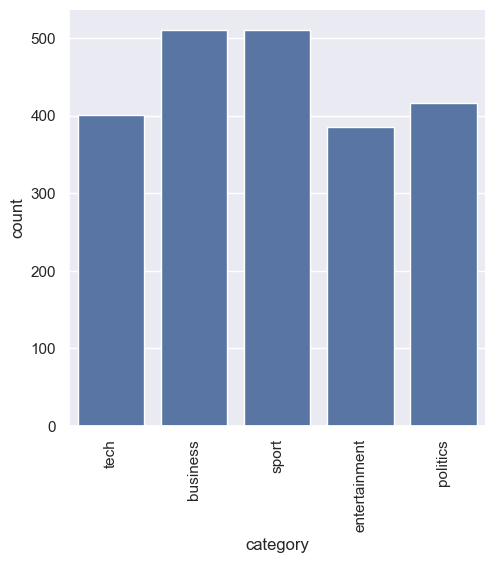

In [11]:
sns.set(font_scale=1)
g = sns.catplot(
            data = data,
            x = "category",
            kind = "count"
            )
g.set_xticklabels(rotation = 90)

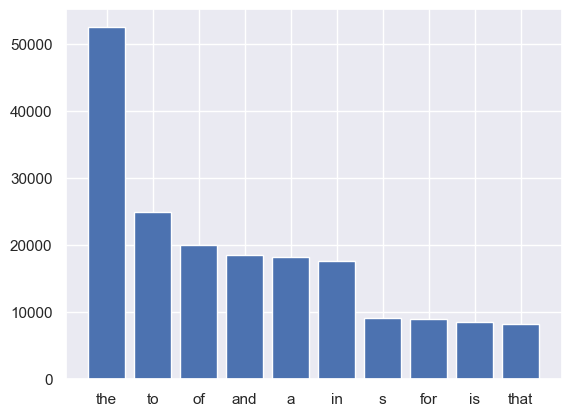

In [12]:
#Let's find out all the stop words like a,the,or etc and plot them
def plot_stopwords(data):
    stop=set(stopwords.words('english'))
    data_split= data.str.split()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    from collections import defaultdict
    dictionary_stopwords=defaultdict(int)
    for word in corpus:
        if word in stop:
            dictionary_stopwords[word]+=1
            
    top=sorted(dictionary_stopwords.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)
plot_stopwords(data['News_Headline'])

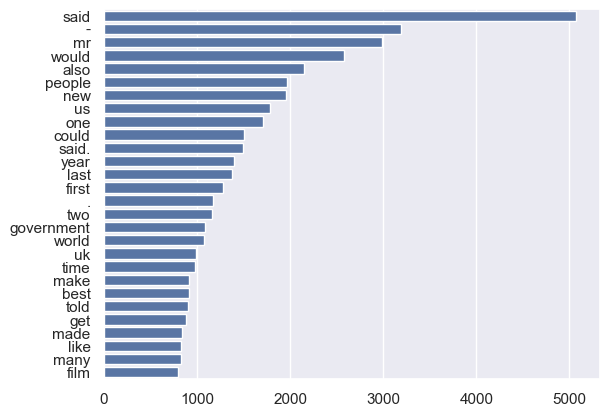

In [13]:
def top_frequent_words(data):
    stop=set(stopwords.words('english'))
    data_split= data.str.split()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    counter=Counter(corpus)
    mostCommon=counter.most_common()
    x, y=[], []
    for word,count in mostCommon[:100]:
        if (word not in stop):
            x.append(word)
            y.append(count)   
    sns.barplot(x=y,y=x)
top_frequent_words(data['News_Headline'])

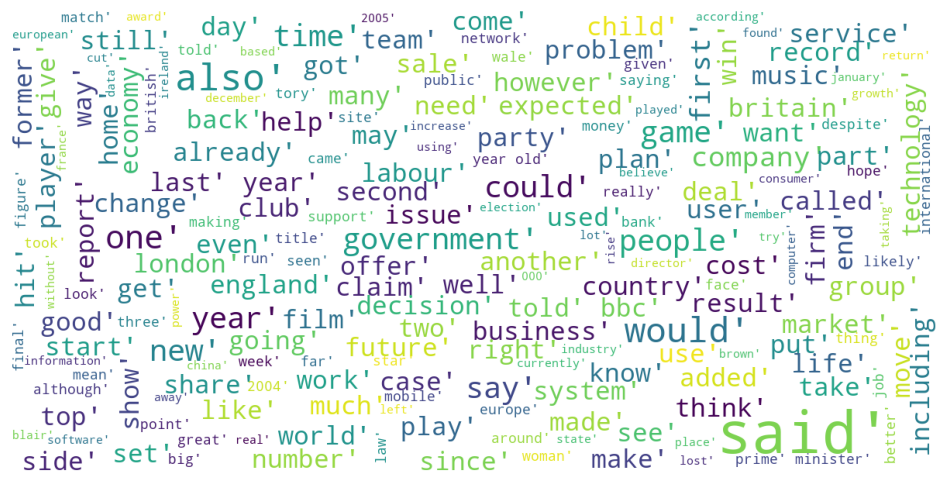

In [14]:
def plot_wordcloud(data):
    stop=set(stopwords.words('english'))
    def _preprocess_text(data):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in data:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(data)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=200,
        max_font_size=25, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()
plot_wordcloud(data['News_Headline'])

In [15]:
data['category'].value_counts()

category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

## Data Preprocessing


In [16]:
# DATA CLEANING
def cleaning(data):
  if len(data)==1:
      word_tokens = word_tokenize(data)
  else:
      print('Data is getting cleaned...')
      # Tokenize : dividing Sentences into words
      data['text_clean'] = data['News_Headline'].apply(nltk.word_tokenize)
      print('Step 1-Tokenization Done!.')
      print(data.head(5))
  
  # Remove stop words
  if len(data)==1:
      stop_words = set(stopwords.words('english')) 
      filtered_sentence = [w for w in word_tokens if not w in stop_words] 
      filtered_sentence = []   
      for w in word_tokens: 
          if w not in stop_words: 
              filtered_sentence.append(w)
  else:
      stop_words=set(nltk.corpus.stopwords.words("english"))
      data['text_clean'] = data['text_clean'].apply(lambda x: [item for item in x if item not in stop_words])
      print('Step 2-All stop words are removed from the list.')
      print(data.head(5))
  # Will keep words and remove numbers and special characters
  if len(data)!=1:
      regex = '[a-z]+'
      data['text_clean'] = data['text_clean'].apply(lambda x: [char for char in x if re.match(regex, char)])
      print('Step3-Numbers and Special Characters are removed.')
      print(data.head(5))
  

cleaning(data)


Data is getting cleaned...
Step 1-Tokenization Done!.
        category                                      News_Headline  \
0           tech  tv future in the hands of viewers with home th...   
1       business  worldcom boss  left books alone  former worldc...   
2          sport  tigers wary of farrell  gamble  leicester say ...   
3          sport  yeading face newcastle in fa cup premiership s...   
4  entertainment  ocean s twelve raids box office ocean s twelve...   

                                          text_clean  
0  [tv, future, in, the, hands, of, viewers, with...  
1  [worldcom, boss, left, books, alone, former, w...  
2  [tigers, wary, of, farrell, gamble, leicester,...  
3  [yeading, face, newcastle, in, fa, cup, premie...  
4  [ocean, s, twelve, raids, box, office, ocean, ...  
Step 2-All stop words are removed from the list.
        category                                      News_Headline  \
0           tech  tv future in the hands of viewers with home th...  

In [17]:
print(len(data))
def detokenize(data):
  for i in range(len(data)):
    data_w = data['text_clean'][i]
    a=TreebankWordDetokenizer().detokenize(data_w)
    data.at[i,'text_clean']=a
detokenize(data)

2225


In [18]:
print(data['text_clean'])

0       tv future hands viewers home theatre systems p...
1       worldcom boss left books alone former worldcom...
2       tigers wary farrell gamble leicester say rushe...
3       yeading face newcastle fa cup premiership side...
4       ocean twelve raids box office ocean twelve cri...
                              ...                        
2220    cars pull us retail figures us retail sales fe...
2221    kilroy unveils immigration policy ex-chatshow ...
2222    rem announce new glasgow concert us band rem a...
2223    political squabbles snowball become commonplac...
2224    souness delight euro progress boss graeme soun...
Name: text_clean, Length: 2225, dtype: object


In [19]:
data.isnull().sum()

category         0
News_Headline    0
text_clean       0
dtype: int64

In [20]:
data.category = data.category.map({'tech':0, 'business':1, 'sport':2, 'entertainment':3, 'politics':4})
data.category.unique()

array([0, 1, 2, 3, 4])

## Data Preparation
There's some work to be done in order for our data to be ready for training.
1. First we'll split the data into training and test sets.
1. Then we'll tokenize the words (text), and then convert them to a numbered index. 
1. Next we'll do the same for the labels (categories), by using the `LabelEncoder` utility.
1. Finally, we'll convert the labels to a one-hot representation.

In [21]:
train_size = int(len(data) * .8)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(data) - train_size))

Train size: 1780
Test size: 445


In [22]:
def train_test_split(data, train_size):
    train = data[:train_size]
    test = data[train_size:]
    return train, test

In [23]:
train_cat, test_cat = train_test_split(data['category'], train_size)
train_text, test_text = train_test_split(data['text_clean'], train_size)

In [24]:
max_words = 1000
tokenize = keras.preprocessing.text.Tokenizer(num_words=max_words, 
                                              char_level=False)

In [25]:
tokenize.fit_on_texts(train_text) # fit tokenizer to our training text data
x_train = tokenize.texts_to_matrix(train_text)
x_test = tokenize.texts_to_matrix(test_text)

In [26]:
encoder = LabelEncoder()
encoder.fit(train_cat)
y_train = encoder.transform(train_cat)
y_test = encoder.transform(test_cat)

In [27]:
# convert the labels to one-hot encoded vectors
num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [28]:
# shape of our input tensor
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (1780, 1000)
x_test shape: (445, 1000)
y_train shape: (1780, 5)
y_test shape: (445, 5)


# Week 2: Model Development


## Building Model 
### Train the model

In [29]:
batch_size = 32
epochs = 2
drop_ratio = 0.5

In [30]:
# build the model 
model = models.Sequential()
model.add(layers.Dense(512, input_shape=(max_words,)))
model.add(layers.Activation('relu'))
#model.add(layers.Dropout(drop_ratio))
model.add(layers.Dense(num_classes))
model.add(layers.Activation('softmax'))
model.summary()

# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               512512    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
 activation_1 (Activation)   (None, 5)                 0         
                                                                 
Total params: 515077 (1.96 MB)
Trainable params: 515077 (1.96 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-10-13 23:56:40.199890: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-10-13 23:56:40.199913: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-10-13 23:56:40.199917: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-10-13 23:56:40.199950: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-13 23:56:40.199966: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [31]:
# train the model
history = model.fit( x_train,
                     y_train,
                     batch_size=batch_size,
                     epochs=epochs,
                     validation_split=0.1)   

Epoch 1/2


2024-10-13 23:56:40.625278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


51/51 [==============================] - 1s 17ms/step - loss: 0.3799 - accuracy: 0.8908 - val_loss: 0.1342 - val_accuracy: 0.9607
Epoch 2/2
 6/51 [==>...........................] - ETA: 0s - loss: 0.0552 - accuracy: 0.9896

2024-10-13 23:56:41.559673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


51/51 [==============================] - 1s 12ms/step - loss: 0.0393 - accuracy: 0.9950 - val_loss: 0.1096 - val_accuracy: 0.9663


### Evaluate the model

In [32]:
score = model.evaluate(x_test,
                       y_test,
                       batch_size = batch_size,
                       verbose= 1)

14/14 [==============================] - 0s 11ms/step - loss: 0.1359 - accuracy: 0.9596


In [33]:
print("Test Accuracy:", score[1])
print("Test Loss:", score[0])

Test Accuracy: 0.9595505595207214
Test Loss: 0.13585329055786133


### Hyperparameter tuning

In [34]:
def run_experiment(batch_size, epochs, drop_ratio):
  print('batch size: {}, epochs: {}, drop_ratio: {}'.format(
      batch_size, epochs, drop_ratio))
  model = models.Sequential()
  model.add(layers.Dense(512, input_shape=(max_words,)))
  model.add(layers.Activation('relu'))
  model.add(layers.Dropout(drop_ratio))
  model.add(layers.Dense(num_classes))
  model.add(layers.Activation('softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_split=0.1)
  score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=0)
  print('\tTest loss:', score[0])
  print('\tTest accuracy:', score[1])

In [35]:
# # hyperparameter tuning search loop to generate different combinations of hyperparameters
# for batch_size in range(10,31,10):
#   for epochs in range(3,15,5):
#     for drop_ratio in np.linspace(0.1, 0.5, 3):
#       run_experiment(batch_size, epochs, drop_ratio)

In [36]:
# batch size: 20, epochs: 8, drop_ratio: 0.5
	# Test loss: 0.12809598445892334
	# Test accuracy: 0.9617977738380432
 
batch_size = 16
epochs = 4
drop_ratio = 0.4
run_experiment(batch_size, epochs, drop_ratio)

batch size: 16, epochs: 4, drop_ratio: 0.4


2024-10-13 23:56:42.806786: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-10-13 23:56:44.112039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


	Test loss: 0.11978025734424591
	Test accuracy: 0.9573033452033997


### Simulation Experiment 

In [37]:
# Assuming the following mapping
label_map = {
    0: 'tech',
    1: 'business',
    2: 'sport',
    3: 'entertainment',
    4: 'politics'
}

# Iterate through the test samples
for i in range(10):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label_index = np.argmax(prediction)  # Get the index of the predicted class
    predicted_label = label_map[predicted_label_index]  # Map to the category name

    actual_label_index = test_cat.iloc[i]  # Get the actual label index
    actual_label = label_map[actual_label_index]  # Map to the category name

    print(test_text.iloc[i][:] + "\n")
    print('Actual label: ' + actual_label)  # Print the actual label category
    print("Predicted label: " + predicted_label + "\n")  # Print the predicted label category

1/1 [==============================] - 0s 66ms/step
hobbit picture four years away lord rings director peter jackson said four years starts work film version hobbit oscar winner said visit sydney desire make lengthy negotiations think gonna lot lawyers sitting room trying thrash deal ever happen said new zealander rights jrr tolkien book split two major film studios jackson currently filming remake hollywood classic king kong said thought sale mgm studios sony corporation would cast uncertainty project australian city visit lord rings exhibition attracted visitors since opened december film-maker recently sued film company new line cinema undisclosed damages alleged withheld profits lost revenue first part middle earth trilogy fellowship ring went make worldwide profits million million jackson thought secured lucrative film directing deal history remake king kong currently production wellington picture stars naomi watts oscar winner adrien brody due released december jackson also commi

2024-10-13 23:56:47.947811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


serena becomes world number two serena williams moved five places second world rankings australian open win williams first grand slam title since victory lindsay davenport world number one men champion marat safin remains fourth atp rankings beaten finalist lleyton hewitt replaces andy roddick world number two roger federer retains top spot safin overtaken hewitt become new leader champions race alicia molik lost three-set thriller davenport quarter-finals women top first time career rise means australia player top men women rankings first time years britain elena baltacha qualified reached third round risen world leap places highest ranking yet

Actual label: sport
Predicted label: sport

1/1 [==============================] - 0s 15ms/step
ultimate game award doom sci-fi shooter doom blasted away competition major games ceremony golden joystick awards title win twice winning ultimate game year best pc game awards presented little britain star matt lucas much-anticipated sci-fi horror 

In [38]:
# Save the trained model
model.save('model/text_classification_model.h5')

/Users/0xnrous/Developer/Tensorflow/env/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
import pickle

# Save the tokenizer
with open('static/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenize, handle, protocol=pickle.HIGHEST_PROTOCOL)